In [2]:
#Importing the necessary libraries
from sklearn.datasets import fetch_california_housing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Loading the dataset
#as_frame=True loads the data in a dataframe format, with other metadata besides it 
california_housing = fetch_california_housing(as_frame=True)

#Select only the dataframe part and assign it to the df variable
df = california_housing.frame

In [6]:
#Exploring the dataset
df.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

# Preprocessing

In [10]:
#We are predicting the mdeian house value.
y = df['MedHouseVal']
x = df.drop(['MedHouseVal'],axis=1) #dropping the MedHouseVal column
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [12]:
x.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [18]:
#Splitting the dataset into training and testing
SEED=42
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

In [19]:
len(x)

20640

In [20]:
len(x_train)

15480

In [21]:
len(x_test)

5160

* Feature scaling is a method used to normalize the range of independent variables or features of data. 


* Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, many classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.


* Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.


* It's also important to apply feature scaling if regularization is used as part of the loss function (so that coefficients are penalized appropriately)

In [23]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
col_names = ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']
scaled_df = pd.DataFrame(x_train,columns=col_names)
scaled_df.describe().T #.T means transform the matrix

,count,mean,std,min,25%,50%,75%,max
MedInc,15480.0,2.074711e-16,1.000032,-1.774632,-0.688854,-0.175663,0.464450,5.842113
HouseAge,15480.0,-1.232434e-16,1.000032,-2.188261,-0.840224,0.032036,0.666407,1.855852
AveRooms,15480.0,-1.620294e-16,1.000032,-1.877586,-0.407008,-0.083940,0.257082,56.357392
AveBedrms,15480.0,7.435912e-17,1.000032,-1.740123,-0.205765,-0.108332,0.007435,55.925392
Population,15480.0,-8.996536e-17,1.000032,-1.246395,-0.558886,-0.227928,0.262056,29.971725
AveOccup,15480.0,1.055716e-17,1.000032,-0.201946,-0.056581,-0.024172,0.014501,103.737365
Latitude,15480.0,7.890329e-16,1.000032,-1.451215,-0.799820,-0.645172,0.971601,2.953905
Longitude,15480.0,2.206676e-15,1.000032,-2.380303,-1.106817,0.536231,0.785934,2.633738


# Fitting the model

In [27]:
regressor = KNeighborsRegressor()
regressor.fit(x_train,y_train)

KNeighborsRegressor()

In [28]:
y_pred = regressor.predict(x_test)

In [29]:
y_pred

array([0.4988  , 0.7646  , 4.750006, ..., 1.3708  , 2.7464  , 3.979202])

# Checking the accuracy

In [30]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared=False) #if True returns MSE value and if flase it returns RMSE value

print(f'mae:{mae}')
print(f'mse:{mse}')
print(f'rmse:{rmse}')

mae:0.4460739527131783
mse:0.4316907430948294
rmse:0.6570317671884894


* The regressor score(R squared) value tells how much of changes in data or data variance are being understood or explained by KNN.

In [32]:
#Returns the coefficient of determination of regression.
regressor.score(x_test,y_test)

0.6737569252627673

In [33]:
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

# Finding the best k value

In [50]:
error = []

#Calculating MSE error for k values between 1 and 39.
for i in range(1,40):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    mae = mean_absolute_error(y_test, pred_i)
    error.append(mae)

Text(0, 0.5, 'Mean Absolute Error')

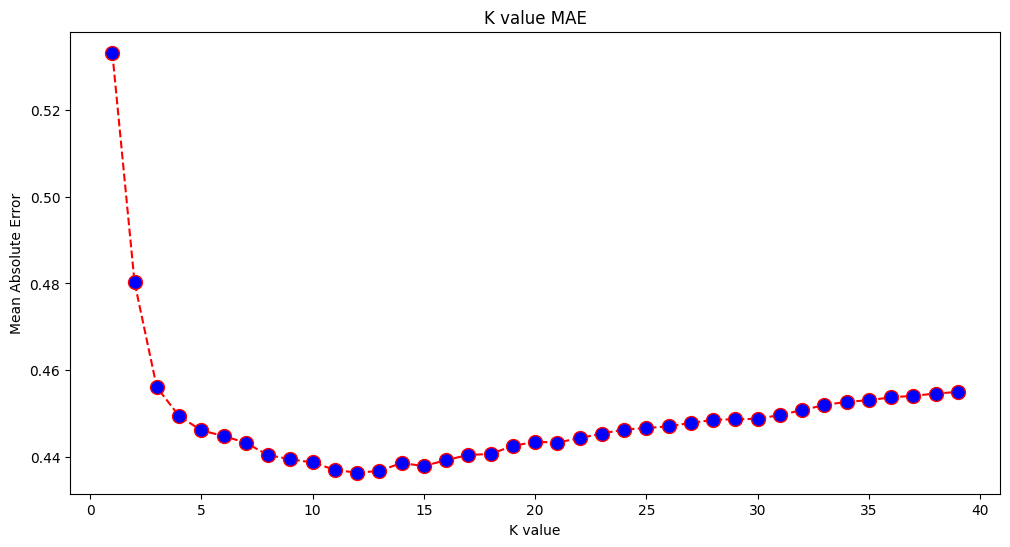

In [51]:
#Plotting the graphs
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)

plt.title('K value MAE')
plt.xlabel('K value')
plt.ylabel('Mean Absolute Error')

Text(0, 0.5, 'Mean Absolute Error')

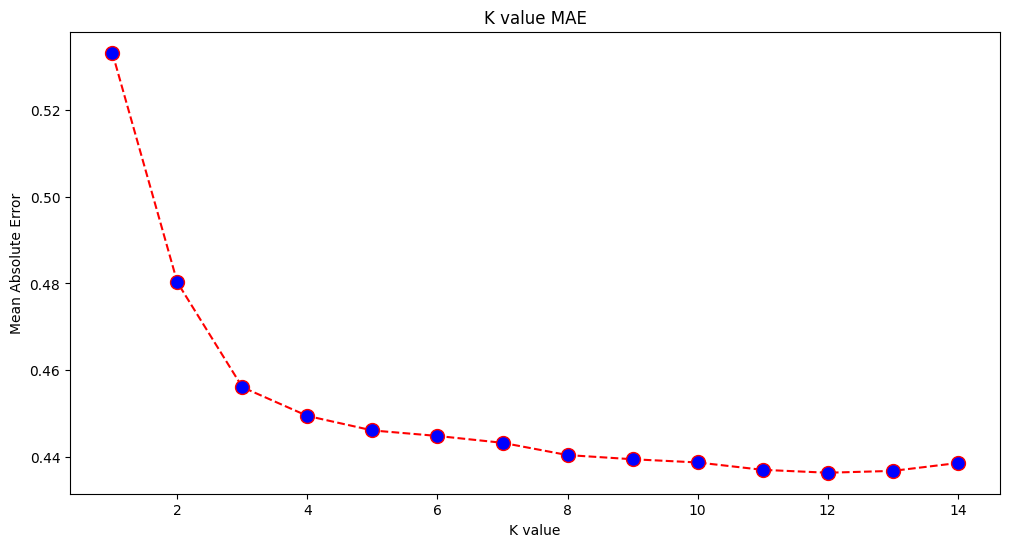

In [52]:
plt.figure(figsize=(12,6))
plt.plot(range(1,15),error[:14],color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)

plt.title('K value MAE')
plt.xlabel('K value')
plt.ylabel('Mean Absolute Error')

* We can also obtain the lowest error index of that point using the built-in min() function(works on lists) or convert the list into a NumPy array and get the argmin() (**index** of the element with the lowest value). We started counting neighbors on 1, while arrays are 0-based, so the 11th index is 12 neighbors.

In [55]:
knn_reg12 = KNeighborsRegressor(n_neighbors=12)
knn_reg12.fit(x_train,y_train)
y_pred12 = knn_reg12.predict(x_test)
r2 = knn_reg12.score(x_test,y_test)

mae12 = mean_absolute_error(y_test,y_pred12)
mse12 = mean_squared_error(y_test,y_pred12)
rmse12 = mean_squared_error(y_test,y_pred12,squared=False)

print(f'r2: {r2}, \nmae: {mae12} \nmse: {mse12} \nrmse: {rmse12}')

r2: 0.6887495617137436, 
mae: 0.43631325936692505 
mse: 0.4118522151025172 
rmse: 0.6417571309323467
